# Project 3: Weekend movie trip
## -loading data
## -Processing data
## -Clustering model and prediction movie
## -conclusion

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

## Loading three data set. movie, tags , rating

In [2]:
movie=pd.read_csv('../data/movies.csv')
tags=pd.read_csv('../data/tags.csv')
rating=pd.read_csv('../data/ratings.csv')

## Processing data
### -merge three table, drop non-usefull column
### -transfering special type data

#### merge movie, tag , and rating into one dataframe, dropping  timestamp.

In [3]:
data=pd.merge(movie,rating)
data=data.drop(columns=['timestamp'])
data=data.merge(tags)
data=data.drop(columns=['timestamp'])
data.dropna(axis=0, how='any', inplace=True)
data

,movieId,title,genres,userId,rating,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,4.0,pixar
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,4.0,pixar
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,3.5,fun
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,4.0,fantasy
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,4.0,magic board game
...,...,...,...,...,...,...
3471,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,4.0,star wars
3472,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,anime
3473,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,comedy
3474,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,gintama


### transfering str type data, 'tag' and 'generes' to int value, drop userid

In [4]:
number = LabelEncoder()
avg_data=data.drop(columns=['userId'])
avg_data['genres'] = number.fit_transform(avg_data['genres'].astype('str'))
avg_data['tag'] = number.fit_transform(avg_data['tag'].astype('str'))
avg_data

,movieId,title,genres,rating,tag
0,1,Toy Story (1995),114,4.0,1210
1,1,Toy Story (1995),114,4.0,1210
2,1,Toy Story (1995),114,3.5,909
3,2,Jumanji (1995),143,4.0,876
4,2,Jumanji (1995),143,4.0,1087
...,...,...,...,...,...
3471,187595,Solo: A Star Wars Story (2018),12,4.0,1392
3472,193565,Gintama: The Movie (2010),48,3.5,586
3473,193565,Gintama: The Movie (2010),48,3.5,746
3474,193565,Gintama: The Movie (2010),48,3.5,925


###  K-mean clusting and prediction
#### -creating dataset by abstract value from dataframe
#### -elbow method to find a good k value, and run clustering method
#### -prediction

### abstract  genres, rating, tag from datafram for clustering. 

In [5]:
X = avg_data.iloc[:,[4,3,2]].values
X

array([[1210. ,    4. ,  114. ],
       [1210. ,    4. ,  114. ],
       [ 909. ,    3.5,  114. ],
       ...,
       [ 746. ,    3.5,   48. ],
       [ 925. ,    3.5,   48. ],
       [1285. ,    3.5,   48. ]])

### Using the elbow method to find  the optimal number of clusters

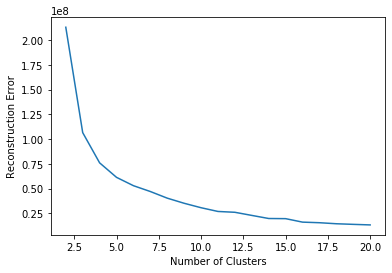

In [6]:
# Using the elbow method to find  the optimal number of clusters
minReconstruction = 100
newI = 0
for i in range(1, 101):
    kmeans = KMeans(n_clusters=3, n_init=1).fit(X)
    if(kmeans.inertia_ < minReconstruction):
        minReconstruction = kmeans.inertia_
        newI = i
        print("New Minimum Reconstruction in Iteration " + str(i) + " of: " + str(kmeans.inertia_))


print()
reconstructionError = {}
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, n_init=1).fit(X)
    reconstructionError[k] = kmeans.inertia_

    if(k == 20):
        plt.figure()
        plt.plot(list(reconstructionError.keys()), list(reconstructionError.values()))
        plt.xlabel("Number of Clusters")
        plt.ylabel("Reconstruction Error")
        plt.show()

#### acording this picture, the elbow point is nearly 6, so we chose k=6 for clustering

In [7]:
kmeans=KMeans(n_clusters=6, init='k-means++', max_iter= 300, n_init= 10, random_state= 0)
y_kmeans=kmeans.fit_predict(X)

#### we adding a new column call cluster to record the clust group for each movie

In [8]:
avg_data['Cluster']=y_kmeans
avg_data.head(3000)

,movieId,title,genres,rating,tag,Cluster
0,1,Toy Story (1995),114,4.0,1210,5
1,1,Toy Story (1995),114,4.0,1210,5
2,1,Toy Story (1995),114,3.5,909,0
3,2,Jumanji (1995),143,4.0,876,0
4,2,Jumanji (1995),143,4.0,1087,0
...,...,...,...,...,...,...
2995,81591,Black Swan (2010),328,3.5,985,0
2996,81591,Black Swan (2010),328,3.5,1177,5
2997,81591,Black Swan (2010),328,3.5,1420,3
2998,82242,Rare Exports: A Christmas Tale (Rare Exports) ...,53,5.0,1088,0


#### creating a function about give a movie recommendation list based on rating and cluster

In [9]:
def recommendation_list(movieName):
    name = avg_data.loc[avg_data['title'] == movieName]['Cluster'].values[0]
    reco_list = avg_data.loc[(avg_data['Cluster'] == name) & (avg_data['rating'] > 4) ]
    reco_list = reco_list.drop_duplicates(subset=['title'])
    return pd.DataFrame(reco_list['title'].values)

### Using the prediciton functin to create a recommanditon table for users.

In [10]:
recommendation_list('Solo: A Star Wars Story (2018)')

,0
0,Sense and Sensibility (1995)
1,Persuasion (1995)
2,Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
3,Babe (1995)
4,"Umbrellas of Cherbourg, The (Parapluies de Che..."
...,...
143,World of Tomorrow (2015)
144,Who Killed Chea Vichea? (2010)
145,Sausage Party (2016)
146,John Wick: Chapter Two (2017)


#### Although clustering classifies different movies, the results are not very accurate, and 148 movies are not of great value in a recommended list. Although the elbow method finds that the value of k is 6, I don’t think this is a reasonable number. Maybe a higher k value can bring a more accurate answer

### Lets try re-clustering the data with higher K value.

In [11]:
kmeans=KMeans(n_clusters=44, init='k-means++', max_iter= 300, n_init= 10, random_state= 0)
y_kmeans=kmeans.fit_predict(X)
avg_data['Cluster']=y_kmeans

In [12]:
recommendation_list('Solo: A Star Wars Story (2018)')

,0
0,Star Wars: Episode IV - A New Hope (1977)
1,Léon: The Professional (a.k.a. The Professiona...
2,"Lion King, The (1994)"
3,Jurassic Park (1993)
4,Star Wars: Episode V - The Empire Strikes Back...
5,"Treasure of the Sierra Madre, The (1948)"
6,Fight Club (1999)
7,Gladiator (2000)
8,Blade II (2002)
9,Safety Last! (1923)


#### i believe we got better list compare to K=6

## Conclusion
### In this project, I removed some irrelevant data and converted some string data types ,then I use k mean clustering to classify movies based on tag, rating and generes. According to the elbow method, the movie is divided into 6 groups. I personally feel that this is just a very crude application of clustering. For a library of thousands of movies, 6 different groups are far from enough. When i increased the K value, i got better result.  However,   the recommendation lists from clustering  are still not very accurate.
###  There is still much room for improvement in this project . In my initial vision, I want to cluster for users rather than the movie itself. But I did not think of a suitable solution to classify users and movies with different tags and multi genres，and I think this database itself already has tags, so starting from movies is not suitable for clustering. It may be more reasonable to cluster movies from users

dataset source: https://grouplens.org/datasets/movielens/
